# Introduction aux arbres binaires
## Un peu de vocabulaire
Un *arbre binaire* est une structure de données hiérarchique dont les éléments sont appelés des *nœuds*, chaque nœud possédant au plus deux éléments au niveau inférieur, appelés *fils gauche* et *fils droit* du nœud (qui est alors le *père* de ses éventuels fils).

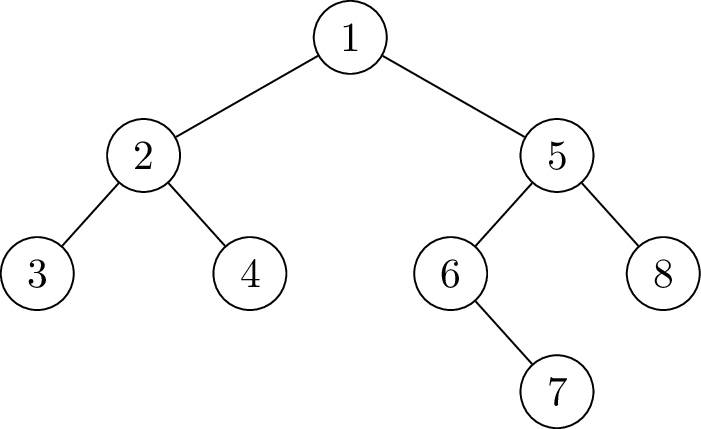


Le nœud initial d'un arbre binaire non vide est appelé la *racine* de l'arbre. Un élément n'ayant aucun fils est appelé une  *feuille* ; un nœud qui possède au moins un fils est appelé un *nœud interne*. 

Pour l'arbre de la figure 1, la racine est le nœud $1$, les feuilles sont les nœuds $3$, $4$, $7$ et $8$.

La *profondeur* d'un nœud est sa distance par rapport à la racine. La *hauteur* d'un arbre est la profondeur maximale de ses nœuds.

*Remarque : Il existe en réalité deux définitions de la hauteur d'un arbre ; nous choisirons celle-ci pour ce TP.*.

Dans l'arbre de la figure 1, la profondeur du nœud $6$ est $2$ ; la hauteur de l'arbre est $3$.

Chaque nœud est la racine d'un arbre constitué de lui-même et de sa descendance : on parle alors de *sous-arbre* de l'arbre initial.

Enfin, un *arbre binaire strict* est un arbre binaire tel que chaque nœud interne possède exactement deux fils.

## Implémentation et fonctions élémentaires

Dans un premier temps, pour implémenter les arbres binaires, on utilisera le type suivant :

In [1]:
type 'a arbre =
  | Vide
  | Noeud of 'a * 'a arbre * 'a arbre
;;

type 'a arbre = Vide | Noeud of 'a * 'a arbre * 'a arbre


La cellule suivante sert à charger les fonctions nécessaires à l'exécution des tests pour les fonctions du TP. N'oubliez donc pas de l'exécuter.

In [2]:
module Utils = struct
  let fonction_test nom b =
    let () = print_endline (Printf.sprintf "%s : %s" nom (if b then "\027[1m\027[32mOK\027[0m" else "\027[1m\027[31méchec\027[0m"))
    in b

  let rec test_liste pretty_print f lst =    
    let rec loop lst ok total =
      match lst with
      | [] -> ok, total
      | (t,tt)::q ->
        loop q (ok + if fonction_test (pretty_print t) (f t = tt) then 1 else 0) (total + 1) 
    in     
    let ok, total = loop lst 0 0 in
    print_endline (Printf.sprintf "%i/%i tests réussis" ok total)
    
  let rec test_liste_avec_nom f lst = 
    let rec loop lst ok total =
      match lst with
      | [] -> ok, total
      | (nom, t, tt)::q ->
        loop q (ok + if fonction_test nom (f t = tt) then 1 else 0) (total + 1) 
    in     
    let ok, total = loop lst 0 0 in
    print_endline (Printf.sprintf "%i/%i tests réussis" ok total)
      
  let uncurry2 f (x,y) = f x y
      
  let uncurry3 f (x,y,z) = f x y z

end 

module Test = struct
  let peigne = Noeud (8, Noeud (7, Noeud (6, Noeud (8, Noeud (5, Vide, Vide), Vide), Vide), Vide), Vide)
  
  let arbre_strict_1 = Noeud (1,Noeud (2, Noeud (3, Vide, Vide), Noeud (4, Vide, Vide)),
                                Noeud (5, Noeud (6,  Vide, Vide), 
                                          Noeud (9, Vide, Vide))
                             )
                             
  let arbre_strict_2 = Noeud (1,Noeud (2, Noeud (3, Vide, Vide), Noeud (4, Vide, Vide)),
                                  Noeud (5, Noeud (6, Noeud (7, Vide, Vide), Noeud (8, Vide, Vide)), 
                                            Noeud (9, Vide, Vide))
                               ) 
  let arbre_desequilibre = Noeud(3, peigne, arbre_strict_1)  
  
  let arbre_maigre = (Noeud (8, Noeud (7, Noeud (6, Vide, Vide), Vide), Vide))

  let un_arbre_de_test =
      Noeud (1, Noeud (3,
                       Noeud (12, Noeud (11, Vide, Vide), Noeud(8, Vide, Vide) ), 
                       Vide),
                Noeud (2, Noeud (10, Vide, Vide), Noeud (6, Noeud (9, Vide, Vide), Noeud (5, Vide, Vide)))
            )
            
    
  let est_strict f =    
    let tests = [("Un arbre strict", arbre_strict_1, true); 
        ("Une feuille", (Noeud(5, Vide, Vide)), true);
        ("Un arbre", un_arbre_de_test, false)
        ] in        
    Utils.test_liste_avec_nom  f tests
    
  let nb_noeuds f =    
    let tests = [("Une feuille", (Noeud(5, Vide, Vide)), 1);
        ("Un arbre vide", Vide, 0);        
        ("Un arbre", un_arbre_de_test, 10)
        ] in        
    Utils.test_liste_avec_nom f tests
    

  let nb_feuilles f =    
    let tests = [("Une feuille", (Noeud(5, Vide, Vide)), 1);
        ("Un arbre vide", Vide, 0); 
        ("Un arbre", un_arbre_de_test, 5)
        ] in        
    Utils.test_liste_avec_nom f tests
    
  let hauteur f =      
    let tests = [("Une feuille", (Noeud(5, Vide, Vide)), 0);
        ("Un arbre", un_arbre_de_test, 3); 
        ("Un arbre déséqulibré", arbre_desequilibre, 5);
        ("Un arbre maigre", arbre_maigre, 2)
        ] in        
    Utils.test_liste_avec_nom f tests
    
  let recherche f =      
    let tests = [("Un arbre (9)", (9, un_arbre_de_test), true); 
        ("Un arbre (42)", (42, un_arbre_de_test), false); 
        ("Un arbre (0)", (0, un_arbre_de_test), false); 
        ("Arbre vide", (42, Vide), false)
        ] in        
    Utils.test_liste_avec_nom (Utils.uncurry2 f) tests
    
    
  let maxi f =      
    let tests = [("Un arbre", un_arbre_de_test, 12); 
        ("Étiquettes négatives", Noeud ( -1, Vide,Noeud(-2, Vide, Vide)) ,-1);
        ("Une feuille min_int", Noeud (min_int, Vide, Vide), min_int);
        ("Un arbre binaire non strict", Noeud (min_int, Vide, Noeud (min_int, Vide, Vide)), min_int); 
        ("Un autre arbre binaire non strict", Noeud (min_int, Noeud (min_int, Vide, Vide), Vide), min_int); 
        ] in        
    Utils.test_liste_avec_nom f tests
    
  let somme f =    
    let tests = [("Une feuille", (Noeud(5, Vide, Vide)), 5);
        ("Un arbre", un_arbre_de_test, 67)
        ] in        
    Utils.test_liste_avec_nom f tests
    
  let somme_max_branche f =    
    let tests = [("Un arbre", un_arbre_de_test, 27);
        ("Étiquettes négatives", Noeud ( -1, Vide, Noeud(-2, Vide, Vide)), -3);        
        ("Encore des étiquettes négatives", Noeud ( -6, Noeud(-60, Noeud(-600, Vide, Vide), Vide), Vide), -666);
        ("Avec un changement de signe", Noeud (-1, Noeud(-2, Vide, Vide), Noeud(6, Vide, Vide)), 5);
        ("Une branche positive bien cachée", Noeud (-1, Noeud (-1, Noeud (-1, Vide, Vide), Vide),
                 Noeud (-1, Noeud (-20, Vide, Vide), Noeud (4,Vide, Vide))), 2);
        ("Un dernier test...", Noeud ( -1, Noeud(1, Vide, Vide), Noeud(-6, Vide, Vide)), 0)
        ] in        
    Utils.test_liste_avec_nom f tests
    
  let diametre f =    
    let fg_bis = Noeud (3, Noeud (12, Noeud (11, Vide, Vide), 
                                           Noeud(8, Noeud(9, Noeud(10, Vide, Vide), Vide),  Vide)),
                                Noeud (4, Noeud (5, Vide, Vide), 
                                          Noeud(6, Noeud(7, Noeud (15, Vide, Noeud (16, Vide, Vide) ), Vide), 
                                                   Vide)))
         and fd_bis = Noeud (2, Vide, Vide) in 
         let a1 =  Noeud (1, fg_bis, fd_bis) in
         let a2 = Noeud(0, fd_bis,  Noeud (1,Vide,fg_bis)) in
         let a3 =   Noeud (1,Vide,Noeud(2,Vide,Noeud(3,Vide,Noeud (4,Vide,Vide)))) in
         let a4 = (Noeud (8, Noeud (7, Noeud (6, Noeud (5, Noeud (4, Vide, Vide), Vide), Vide), Vide), Noeud (42, Vide, Vide))) in
    let tests = [("Un arbre", un_arbre_de_test, 6);
        ("Un autre arbre", a1, 9);        
        ("Encore un arbre", a2, 9);
        ("Fils uniques", a3, 3);
        ("Une feuille", Noeud(0, Vide, Vide), 0);
        ("Un dernier test...", a4, 5)
        ] in        
    Utils.test_liste_avec_nom f tests

end

module Utils :
  sig
    val fonction_test : string -> bool -> bool
    val test_liste : ('a -> string) -> ('a -> 'b) -> ('a * 'b) list -> unit
    val test_liste_avec_nom : ('a -> 'b) -> (string * 'a * 'b) list -> unit
    val uncurry2 : ('a -> 'b -> 'c) -> 'a * 'b -> 'c
    val uncurry3 : ('a -> 'b -> 'c -> 'd) -> 'a * 'b * 'c -> 'd
  end


module Test :
  sig
    val peigne : int arbre
    val arbre_strict_1 : int arbre
    val arbre_strict_2 : int arbre
    val arbre_desequilibre : int arbre
    val arbre_maigre : int arbre
    val un_arbre_de_test : int arbre
    val est_strict : (int arbre -> bool) -> unit
    val nb_noeuds : (int arbre -> int) -> unit
    val nb_feuilles : (int arbre -> int) -> unit
    val hauteur : (int arbre -> int) -> unit
    val recherche : (int -> int arbre -> bool) -> unit
    val maxi : (int arbre -> int) -> unit
    val somme : (int arbre -> int) -> unit
    val somme_max_branche : (int arbre -> int) -> unit
    val diametre : (int arbre -> int) -> unit
  end


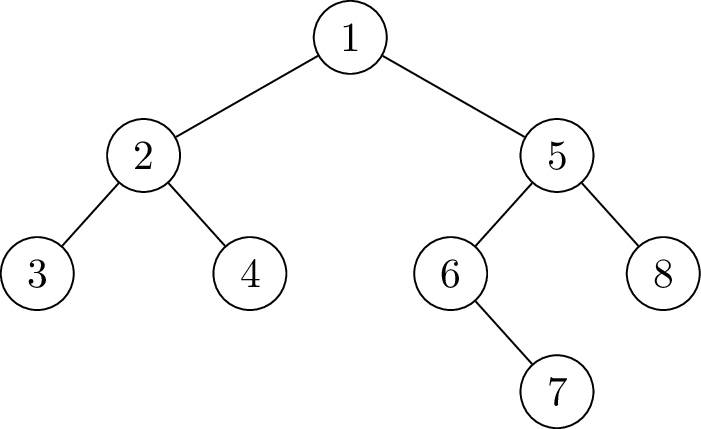

Par exemple, le sous-arbre gauche de l'arbre au-dessus pourra être défini par :

In [ ]:
let arbre_gauche = Noeud(2, Noeud(3, Vide, Vide), Noeud(4, Vide, Vide));;

<font size="5"> 👩🏽‍💻</font> Définir en OCaml une variable `mon_arbre` correspondant à l'arbre ci-dessus. On pourra utiliser l'arbre `arbre_gauche` créé précédemment, et commencer par créer un arbre `arbre_droit` pour décrire le sous-arbre droit.

On prendra garde au fait que le nœud avec l'étiquette 7 est à **droite** du nœud dont l'étiquette est 6.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

<font size="5">👨🏾‍💻</font>  Écrire une fonction `est_strict : 'a arbre -> bool`  prenant en argument un arbre et renvoyant  `true` s'il s'agit d'un arbre binaire strict,  `false` sinon.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

**Tests personnels**  

In [ ]:
(* Utiliser la cellule pour exécuter quelques appels et vérifier les résultats obtenus *)

**Tests automatiques**  

In [ ]:
let () = Test.est_strict est_strict    

<font size="5">👩🏻‍💻</font>  Écrire une fonction `nb_noeuds : 'a arbre -> int` prenant en argument un arbre et renvoyant le nombre total de nœuds de l'arbre.

*Remarque : Les feuilles sont aussi des nœuds*.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

**Tests personnels**  

In [ ]:
(* Utiliser la cellule pour exécuter quelques appels et vérifier les résultats obtenus *)

**Tests automatiques**  

In [ ]:
(* Exécutez cette cellule pour tester votre fonction *)
let () = Test.nb_noeuds nb_noeuds

<font size="5">👨‍💻 </font>  Écrire une fonction `nb_feuilles : 'a arbre -> int` prenant en argument un arbre et renvoyant le nombre de feuilles de l'arbre.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

**Tests personnels**  

In [ ]:
(* Utiliser la cellule pour exécuter quelques appels et vérifier les résultats obtenus *)

**Tests automatiques**  

In [ ]:
(* Exécutez cette cellule pour tester votre fonction *)
let () = Test.nb_feuilles nb_feuilles

<font size="5">👨🏿‍💻 </font>  Écrire une fonction `hauteur : 'a arbre -> int`  prenant en argument un arbre et renvoyant sa hauteur.  
Par convention, on pourra considérer que la hauteur de l'arbre vide est $-1$.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

**Tests personnels**  

In [ ]:
(* Utiliser la cellule pour exécuter quelques appels et vérifier les résultats obtenus *)

**Tests automatiques**  

In [ ]:
(* Exécutez cette cellule pour tester votre fonction *)
let () = Test.hauteur hauteur

<font size="5">👩🏼‍💻</font>  Écrire une fonction `recherche : 'a -> 'a arbre -> bool`  prenant en argument un élément et un arbre et renvoyant `true` si l'élément est présent dans l'arbre, `false` sinon.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

**Tests personnels**  

In [ ]:
(* Utiliser la cellule pour exécuter quelques appels et vérifier les résultats obtenus *)

**Tests automatiques**  

In [ ]:
(* Exécutez cette cellule pour tester votre fonction *)
let () = Test.recherche recherche

## Quelques fonctions sur des arbres étiquetés par des entiers
On considère ici des arbres dont les étiquettes sont de type  `int`.

<font size="5">👨🏽‍💻</font>  Écrire une fonction `maxi : 'a arbre -> 'a`  prenant en argument un arbre et renvoyant le maximum de ses étiquettes.

On pourra utiliser la fonction `max : 'a -> 'a -> 'a` qui prend deux arguments et renvoie le plus grand des deux.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

**Tests personnels**  

In [ ]:
(* Utiliser la cellule pour exécuter quelques appels et vérifier les résultats obtenus *)

**Tests automatiques**  

In [ ]:
(* Exécutez cette cellule pour tester votre fonction *)
let () = Test.maxi maxi

<font size="5">👩‍💻</font>  Écrire une fonction `somme : int arbre -> int`  prenant en argument un arbre et renvoyant la somme de ses étiquettes.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

In [ ]:
(* Exécutez cette cellule pour tester votre fonction *)
let () = Test.somme somme

<font size="5">👨🏼‍💻</font>   On considère pour chaque branche de l'arbre (i.e un chemin de la racine à une feuille) la somme des étiquettes de ses nœuds. Écrire une fonction `somme_max_branche : int arbre -> int` donnant la somme maximale des branches d'un arbre.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

**Tests personnels**  

In [ ]:
(* Utiliser la cellule pour exécuter quelques appels et vérifier les résultats obtenus *)

**Tests automatiques**  

In [ ]:
(* Exécutez cette cellule pour tester votre fonction *)
let () = Test.somme_max_branche somme_max_branche

## Diamètre d'un arbre
Étant donné un arbre binaire $\mathcal{A}$, on appelle *diamètre* de $\mathcal{A}$ la longueur d'un plus long chemin dans $\mathcal{A}$.

<font size="5">👩🏾‍💻</font>  Quel est la longueur d'un plus long chemin passant par la racine ?

✍️ *Votre réponse*

<font size="5">👨‍💻</font>  Écrire une fonction `diametre : 'a arbre -> int` calculant le diamètre d'un arbre binaire ; on distinguera trois cas.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

**Tests personnels**  

In [ ]:
(* Utiliser la cellule pour exécuter quelques appels et vérifier les résultats obtenus *)

**Tests automatiques**  

In [ ]:
(* Exécutez cette cellule pour tester votre fonction *)
let () = Test.diametre diametre